In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

In [26]:
df = pd.read_csv('/content/raw_sales.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29580 entries, 0 to 29579
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   datesold      29580 non-null  object
 1   postcode      29580 non-null  int64 
 2   price         29580 non-null  int64 
 3   propertyType  29580 non-null  object
 4   bedrooms      29580 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.1+ MB


In [27]:
df.head()

,datesold,postcode,price,propertyType,bedrooms
0,2007-02-07 00:00:00,2607,525000,house,4
1,2007-02-27 00:00:00,2906,290000,house,3
2,2007-03-07 00:00:00,2905,328000,house,3
3,2007-03-09 00:00:00,2905,380000,house,4
4,2007-03-21 00:00:00,2906,310000,house,3


**USING Z SCORES**

In [29]:
def total_outliers(data):

  outliers = []

  data_std = statistics.stdev(data)
  data_mean = statistics.mean(data)

  lower_limit = data_mean - (3 * data_std)
  upper_limit = data_mean + (3 * data_std)

  for i in data:
    if i < lower_limit or i > upper_limit:
      outliers.append(i)

  return outliers

In [30]:
len(df['price'])

29580

In [31]:
price_anomalies = total_outliers(df['price'])
len(price_anomalies)

461

In [32]:
df['price'].skew()

np.float64(4.312009366902366)

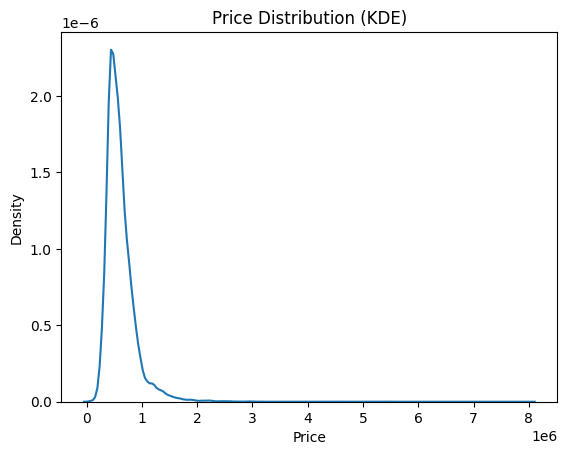

In [33]:

sns.kdeplot(df['price'])
plt.title('Price Distribution (KDE)')
plt.xlabel('Price')
plt.ylabel('Density')
plt.show()


In [34]:
df['price_transformed'] = np.log(df['price'])
price_anomalies_1 = total_outliers(df['price_transformed'])
len(price_anomalies_1)

266

In [35]:
df['price_transformed'].skew()

np.float64(0.4731646269984763)

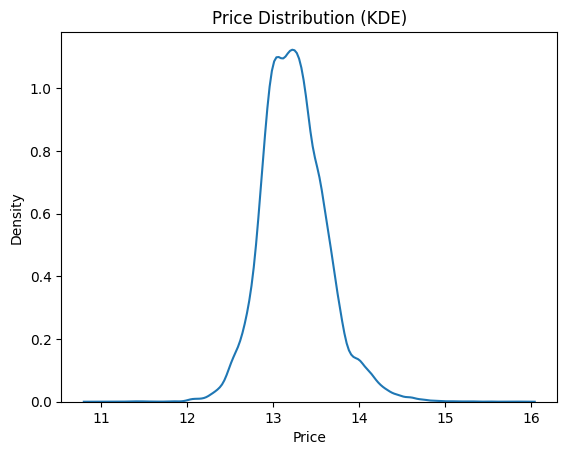

In [36]:

sns.kdeplot(df['price_transformed'])
plt.title('Price Distribution (KDE)')
plt.xlabel('Price')
plt.ylabel('Density')
plt.show()


In [37]:
df['price_transformed_double'] = np.log(df['price_transformed'])
price_anomalies_2 = total_outliers(df['price_transformed_double'])
len(price_anomalies_2)

251

In [38]:
df['price_transformed_double'].skew()

np.float64(0.33092530655758573)

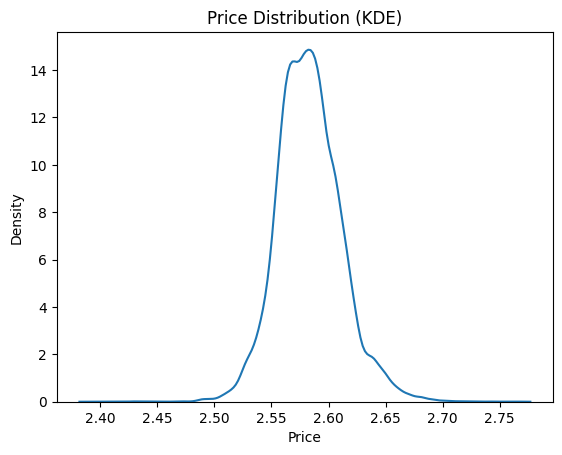

In [39]:

sns.kdeplot(df['price_transformed_double'])
plt.title('Price Distribution (KDE)')
plt.xlabel('Price')
plt.ylabel('Density')
plt.show()


**BOXPLOT**

<Axes: >

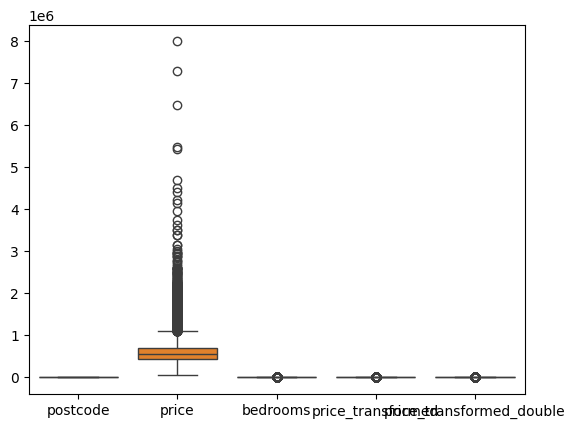

In [40]:
sns.boxplot(data=df)

In [41]:
df.head()

,datesold,postcode,price,propertyType,bedrooms,price_transformed,price_transformed_double
0,2007-02-07 00:00:00,2607,525000,house,4,13.171154,2.578029
1,2007-02-27 00:00:00,2906,290000,house,3,12.577636,2.531920
2,2007-03-07 00:00:00,2905,328000,house,3,12.700769,2.541663
3,2007-03-09 00:00:00,2905,380000,house,4,12.847927,2.553182
4,2007-03-21 00:00:00,2906,310000,house,3,12.644328,2.537209


In [42]:
df.describe()

,postcode,price,bedrooms,price_transformed,price_transformed_double
count,29580.000000,2.958000e+04,29580.000000,29580.000000,29580.000000
mean,2730.249730,6.097363e+05,3.250169,13.244695,2.583199
std,146.717292,2.817079e+05,0.951275,0.375214,0.028183
min,2600.000000,5.650000e+04,0.000000,10.941996,2.392608
25%,2607.000000,4.400000e+05,3.000000,12.994530,2.564529
50%,2615.000000,5.500000e+05,3.000000,13.217674,2.581555
75%,2905.000000,7.050000e+05,4.000000,13.465953,2.600165
max,2914.000000,8.000000e+06,5.000000,15.894952,2.766002
